## Using GP as a optimizator

0-th iteration with the best fitness = 0.02731317344811013
10-th iteration with the best fitness = 0.2517419971227344
20-th iteration with the best fitness = 0.5908309142436124
30-th iteration with the best fitness = 0.9336781128335602
40-th iteration with the best fitness = 0.9638328215235646
50-th iteration with the best fitness = 0.9810731325577302
60-th iteration with the best fitness = 0.990995060886291
70-th iteration with the best fitness = 0.990995060886291
80-th iteration with the best fitness = 0.990995060886291
90-th iteration with the best fitness = 0.9913315311465307
The fittest individ: ((((x0/(((5.2412/5)/x0) * 3)) + -(3 + ((x0/5)/x0)))/-3)/((((3 + ((x0/5)/x0))/3)/((x0/5.2412) + x0)) + ((-x0/3) + --(x0/2))))
with fitness 0.9914007862372298


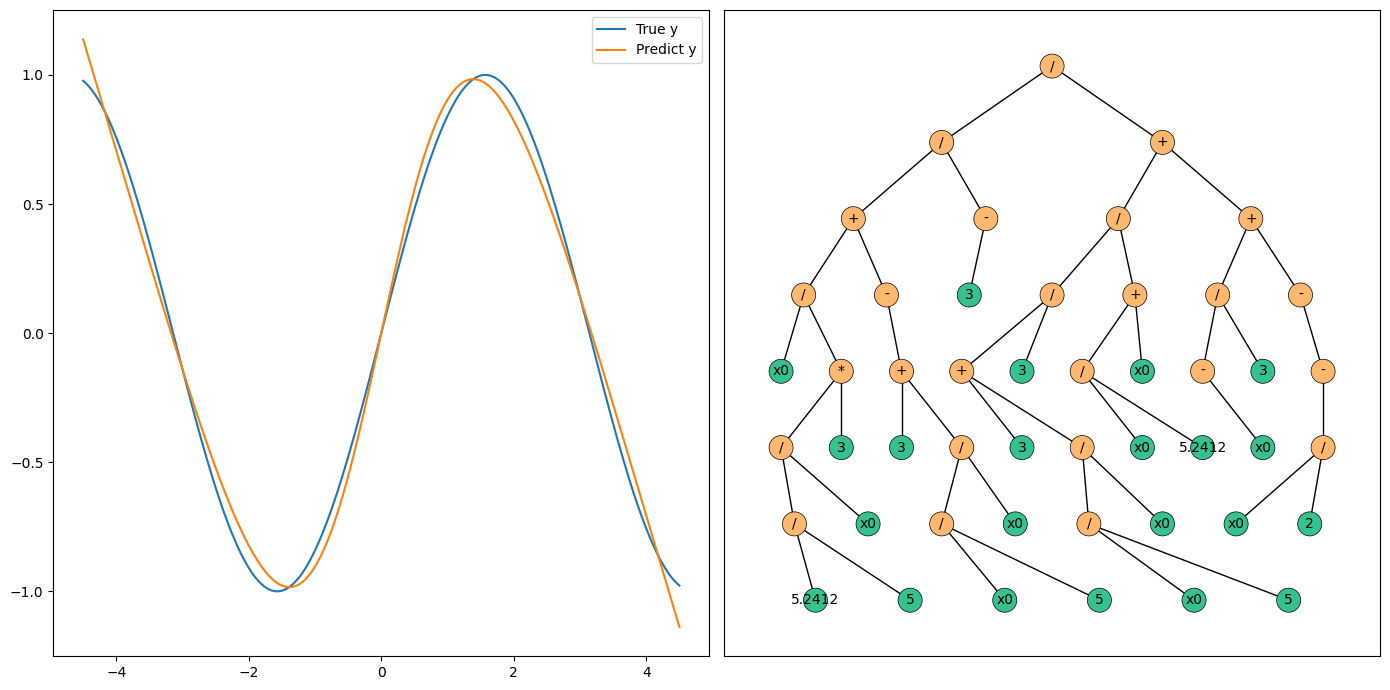

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from thefittest.base import FunctionalNode
from thefittest.base import TerminalNode
from thefittest.base import EphemeralNode
from thefittest.base import UniversalSet
from thefittest.optimizers import GeneticProgramming
from thefittest.tools.operators import Mul
from thefittest.tools.operators import Add
from thefittest.tools.operators import Div
from thefittest.tools.operators import Neg
from thefittest.tools.metrics import coefficient_determination
from thefittest.tools.print import print_tree


def generator1():
    return np.round(np.random.uniform(0, 10), 4)


def generator2():
    return np.random.randint(0, 10)


def problem(x):
    return np.sin(x[:,0])


function = problem
left_border = -4.5
right_border = 4.5
sample_size = 300
n_dimension = 1

number_of_iterations = 100
population_size = 500

X = np.array([np.linspace(left_border, right_border, sample_size)
              for _ in range(n_dimension)]).T
y = function(X)


functional_set = (FunctionalNode(Add()),
                  FunctionalNode(Mul()),
                  FunctionalNode(Neg()),
                  FunctionalNode(Div()))


terminal_set = [TerminalNode(X[:, i], f'x{i}') for i in range(n_dimension)]
terminal_set.extend([EphemeralNode(generator1), EphemeralNode(generator2)])
uniset = UniversalSet(functional_set, tuple(terminal_set))


def fitness_function(trees):
    fitness = []
    for tree in trees:
        y_pred = tree()*np.ones(len(y))
        fitness.append(coefficient_determination(y, y_pred))
    return np.array(fitness)


optimizer = GeneticProgramming(fitness_function=fitness_function,
                               uniset=uniset,
                               pop_size=population_size,
                               iters=number_of_iterations,
                               show_progress_each=10,
                               minimization=False,
                               keep_history=False, 
                               selection="tournament_k",
                               mutation="gp_weak_grow", 
                               tour_size=5,
                               max_level=7)

optimizer.fit()

fittest = optimizer.get_fittest()
stats = optimizer.get_stats()

predict = fittest['phenotype']()

print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])

fig, ax = plt.subplots(figsize=(14, 7), ncols=2, nrows=1)

ax[0].plot(X[:,0], y, label = "True y")
ax[0].plot(X[:,0], predict, label = "Predict y")
ax[0].legend()

print_tree(tree=fittest['phenotype'], ax=ax[1])

plt.tight_layout()
plt.show()

## Using SelfCGP as a optimizator

0-th iteration with the best fitness = 0.037304823624049965
10-th iteration with the best fitness = 0.2540788324379476
20-th iteration with the best fitness = 0.3448690848096734
30-th iteration with the best fitness = 0.347044493191626
40-th iteration with the best fitness = 0.3588928197884311
50-th iteration with the best fitness = 0.35895766874613255
60-th iteration with the best fitness = 0.35895766874613255
70-th iteration with the best fitness = 0.4371124122527472
80-th iteration with the best fitness = 0.4371124122527472
90-th iteration with the best fitness = 0.4371124122527472
The fittest individ: (((x0 + (9.0202 + x0)) + x0)/((x0 + 6.0418) * -((x0 + 9.0202)/x0)))
with fitness 0.4371124122527472


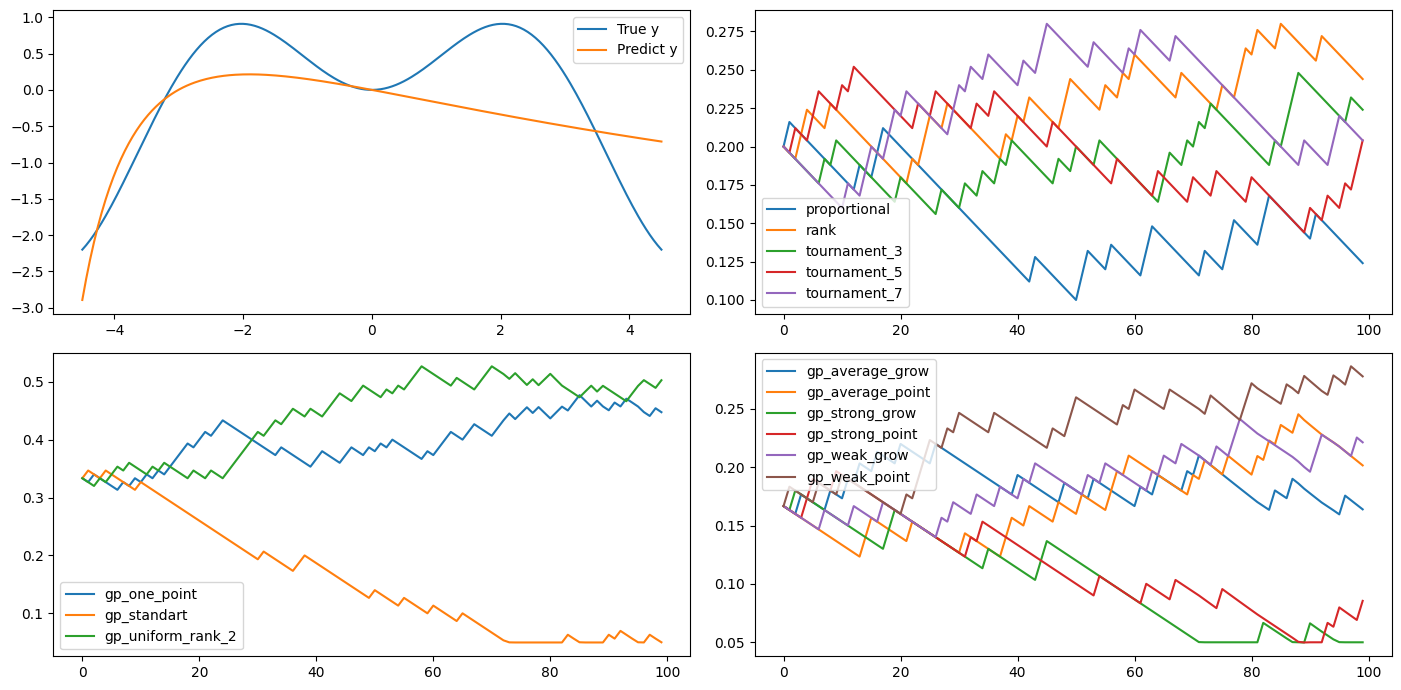

In [2]:
from collections import defaultdict
from thefittest.optimizers import SelfCGP


def problem(x):
    return np.sin(x[:,0])*x[:,0]*0.5


function = problem
y = function(X)

functional_set = (FunctionalNode(Add()),
                  FunctionalNode(Mul()),
                  FunctionalNode(Neg()),
                  FunctionalNode(Div()))

terminal_set = [TerminalNode(X[:, i], f'x{i}') for i in range(n_dimension)]
terminal_set.extend([EphemeralNode(generator1), EphemeralNode(generator2)])
uniset = UniversalSet(functional_set, tuple(terminal_set))


def fitness_function(trees):
    fitness = []
    for tree in trees:
        y_pred = tree()*np.ones(len(y))
        fitness.append(coefficient_determination(y, y_pred))
    return np.array(fitness)


optimizer = SelfCGP(fitness_function=fitness_function,
                    uniset=uniset,
                    pop_size=population_size,
                    iters=number_of_iterations,
                    show_progress_each=10,
                    minimization=False,
                    keep_history=True)

optimizer.fit()

fittest = optimizer.get_fittest()
stats = optimizer.get_stats()

predict = fittest['phenotype']()

print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])

fig, ax = plt.subplots(figsize=(14, 7), ncols=2, nrows=2)


ax[0][0].plot(X[:,0], y, label = "True y")
ax[0][0].plot(X[:,0], predict, label = "Predict y")
ax[0][0].legend()

selectiom_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['s_proba'][i].items():
        selectiom_proba[key].append(value)
    
for key, value in selectiom_proba.items():
    ax[0][1].plot(range(number_of_iterations), value, label = key)
ax[0][1].legend()

crossover_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['c_proba'][i].items():
        crossover_proba[key].append(value)
    
for key, value in crossover_proba.items():
    ax[1][0].plot(range(number_of_iterations), value, label = key)
ax[1][0].legend()

mutation_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['m_proba'][i].items():
        mutation_proba[key].append(value)
    
for key, value in mutation_proba.items():
    ax[1][1].plot(range(number_of_iterations), value, label = key)
ax[1][1].legend()

plt.tight_layout()
plt.show()

## Using GP as a machine learning model

0-th iteration with the best fitness = -3.5418206145720887e-09
10-th iteration with the best fitness = 0.8964398885806764
20-th iteration with the best fitness = 0.8964398885806764
30-th iteration with the best fitness = 0.8964398885806764
40-th iteration with the best fitness = 0.8964398885806764
50-th iteration with the best fitness = 0.8964398885806764
60-th iteration with the best fitness = 0.8964398885806764
70-th iteration with the best fitness = 0.8964398885806764
80-th iteration with the best fitness = 0.8964398885806764
90-th iteration with the best fitness = 0.8964398885806764
The fittest individ: sin((x0 * sin((cos(cos(3)) * sin((3 * x0))))))
with fitness 0.8964398885806764


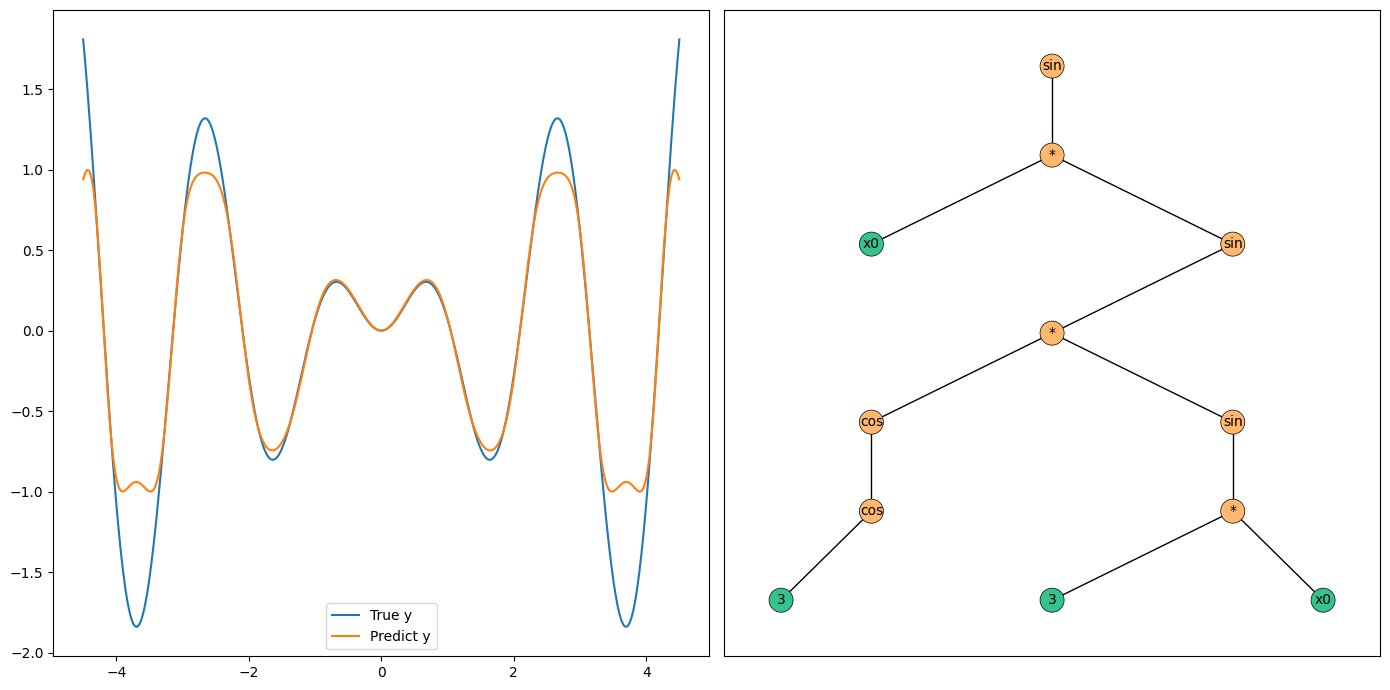

In [3]:
from thefittest.regressors import SymbolicRegressionGP


def problem(x):
    return np.sin(x[:,0]*3)*x[:,0]*0.5


function = problem
y = function(X)


model = SymbolicRegressionGP(iters=number_of_iterations,
                             pop_size=population_size,
                             optimizer=GeneticProgramming,
                             optimizer_args={"crossover": "gp_standart",
                                             "keep_history": True,
                                             "show_progress_each": 10,
                                             "elitism": False})

model.fit(X, y)

predict = model.predict(X)

fittest = model.get_optimizers().get_fittest()
stats = model.get_optimizers().get_stats()

print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])

fig, ax = plt.subplots(figsize=(14, 7), ncols=2, nrows=1)

ax[0].plot(X[:,0], y, label = "True y")
ax[0].plot(X[:,0], predict, label = "Predict y")
ax[0].legend()

print_tree(tree=fittest['phenotype'], ax=ax[1])

plt.tight_layout()
plt.show()

## Using SelfCGP as a machine learning model

0-th iteration with the best fitness = -0.00026991401007325777
10-th iteration with the best fitness = 0.04205008450309389
20-th iteration with the best fitness = 0.37103755095183166
30-th iteration with the best fitness = 0.551172737574704
40-th iteration with the best fitness = 0.5661604240049508
50-th iteration with the best fitness = 0.5661604240049508
60-th iteration with the best fitness = 0.5939431704963906
70-th iteration with the best fitness = 0.5939431704963906
80-th iteration with the best fitness = 0.6763841451270933
90-th iteration with the best fitness = 0.7632035067106002
The fittest individ: ((cos(x0) * (1/(cos(3) * (1/sin(((cos(x0) * (1/(cos(3) * (1/((x0**2) * (1/6.6545)))))) * sin(((cos(x0) * (1/(cos(3) * (1/((x0**2) * (1/6.6545)))))) * ((3.6019**2) * (1/6)))))))))) * ((x0**2) * (1/6)))
with fitness 0.7776276960904983


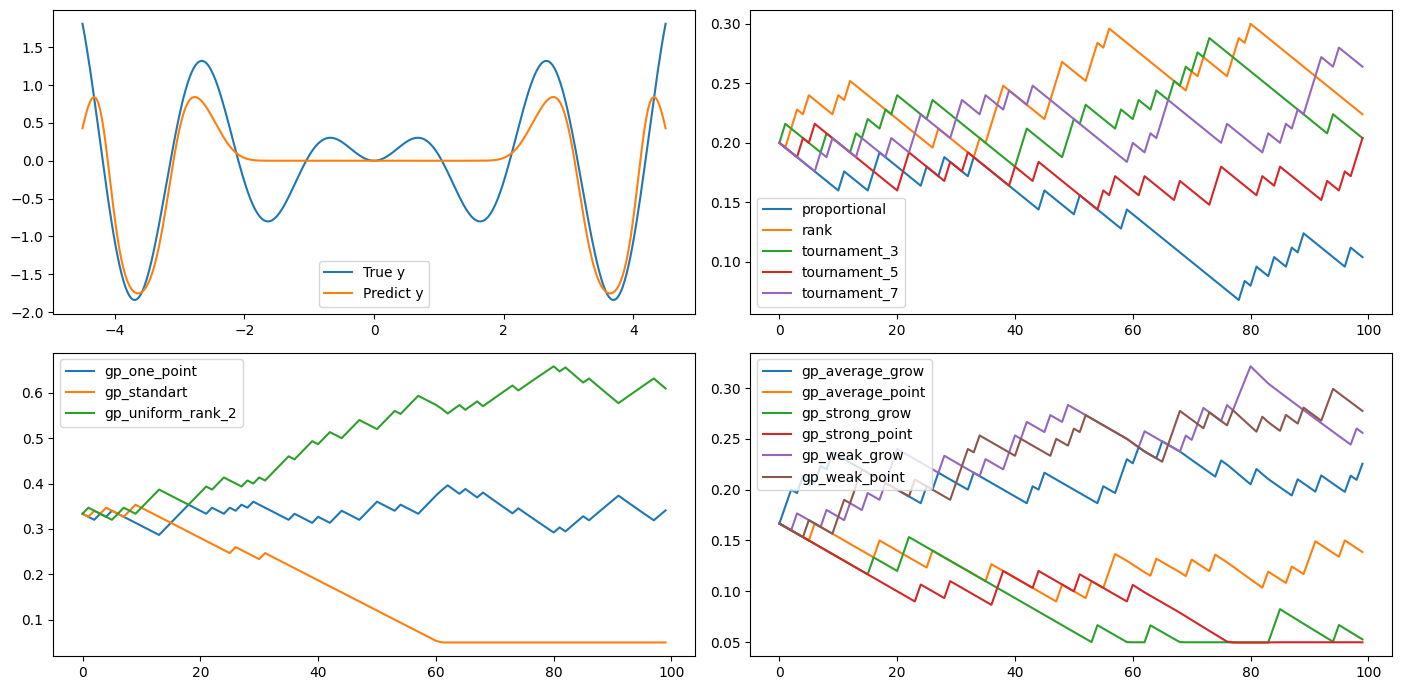

In [4]:
from thefittest.regressors import SymbolicRegressionGP


model = SymbolicRegressionGP(iters=number_of_iterations,
                             pop_size=population_size,
                             optimizer=SelfCGP,
                             optimizer_args={"keep_history": True,
                                             "show_progress_each": 10,
                                             "elitism": True})

model.fit(X, y)

predict = model.predict(X)

fittest = model.get_optimizers().get_fittest()
stats = model.get_optimizers().get_stats()

print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])

fig, ax = plt.subplots(figsize=(14, 7), ncols=2, nrows=2)


ax[0][0].plot(X[:,0], y, label = "True y")
ax[0][0].plot(X[:,0], predict, label = "Predict y")
ax[0][0].legend()

selectiom_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['s_proba'][i].items():
        selectiom_proba[key].append(value)
    
for key, value in selectiom_proba.items():
    ax[0][1].plot(range(number_of_iterations), value, label = key)
ax[0][1].legend()

crossover_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['c_proba'][i].items():
        crossover_proba[key].append(value)
    
for key, value in crossover_proba.items():
    ax[1][0].plot(range(number_of_iterations), value, label = key)
ax[1][0].legend()

mutation_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['m_proba'][i].items():
        mutation_proba[key].append(value)
    
for key, value in mutation_proba.items():
    ax[1][1].plot(range(number_of_iterations), value, label = key)
ax[1][1].legend()

plt.tight_layout()
plt.show()